Example of genetic art code porting to Python.

In [1]:


import numpy as np
from PIL import Image
from IPython.display import display

from quaternion import Quaternions
from op_map import formula_to_op_tree, OpDescr, QOP_tree, r_dispatch



In [2]:
# define image shape
height = 300
width = 300
depth = 1
data_shape = (width, height, 1)


In [3]:
formula_str = "( A2 ( mod golden x+iy ) ( /( +( +( A1 j y+k ) y+k ) y+k ) x+iy ) )"

In [4]:
op_tree = formula_to_op_tree(formula_str)

op_tree

(OpDescr(name='A2', degree=2, call_str='qaut2(a, b)', call_name='qaut2', depends_on_coords=False),
 (OpDescr(name='mod', degree=2, call_str='qmod(a, b)', call_name='qmod', depends_on_coords=False),
  OpDescr(name='golden', degree=0, call_str='qc5()', call_name='qc5', depends_on_coords=False),
  OpDescr(name='x_iy', degree=0, call_str='qcxy(x, y, z)', call_name='qcxy', depends_on_coords=True)),
 (OpDescr(name='/', degree=2, call_str='qdiv(a, b)', call_name='qdiv', depends_on_coords=False),
  (OpDescr(name='+', degree=2, call_str='qplus(a, b)', call_name='qplus', depends_on_coords=False),
   (OpDescr(name='+', degree=2, call_str='qplus(a, b)', call_name='qplus', depends_on_coords=False),
    (OpDescr(name='A1', degree=2, call_str='qaut1(a, b)', call_name='qaut1', depends_on_coords=False),
     OpDescr(name='j', degree=0, call_str='qc3()', call_name='qc3', depends_on_coords=False),
     OpDescr(name='y_k', degree=0, call_str='qcy1(x, y, z)', call_name='qcy1', depends_on_coords=True)),
   

In [5]:
op_tree[0]

OpDescr(name='A2', degree=2, call_str='qaut2(a, b)', call_name='qaut2', depends_on_coords=False)

In [6]:
# build data tensors
x_vec = np.linspace(start=0, stop=1, num=width)
y_vec = np.linspace(start=0, stop=1, num=height)
z_vec = np.zeros(1)

x = np.zeros(data_shape)
y = np.zeros(data_shape)
z = np.zeros(data_shape)

for xi in range(width):
    for yi in range(height):
        for zi in range(depth):
            x[xi][yi][zi] = x_vec[xi]
            y[xi][yi][zi] = y_vec[yi]
            z[xi][yi][zi] = z_vec[zi]

In [7]:
res = r_dispatch(op_tree, data_shape=data_shape)

In [8]:
res_q = res.eval_tree(x=x, y=y, z=z)

In [9]:
# define image shape
image_shape = (width, height, 3)
# copy result into image
img_tensor = np.zeros(image_shape)
for xi in range(width):
    for yi in range(height):
        img_tensor[xi][yi][0] = res_q.i[xi][yi][0]
        img_tensor[xi][yi][1] = res_q.j[xi][yi][0]
        img_tensor[xi][yi][2] = res_q.k[xi][yi][0]

In [10]:
# move to 0 to 255 integers
img_tensor = np.round(256 / (1 + np.exp(-img_tensor)))
img_tensor = np.minimum(img_tensor, 255)
img_tensor = np.maximum(img_tensor, 0)

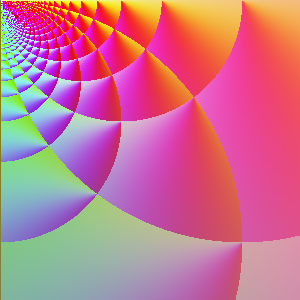

In [11]:
img = Image.new("RGB", size=(width, height))
pixels = []
for xi in range(width):
    for yi in range(height):
        pixels.append((int(img_tensor[xi][yi][0]), int(img_tensor[xi][yi][1]), int(img_tensor[xi][yi][2])))
img.putdata(pixels)
display(img)